In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.linear_model import LinearRegression

import joblib

In [2]:
DATA_FILE_PATH = r"./car_prices.csv"
df = pd.read_csv(DATA_FILE_PATH)


In [3]:
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


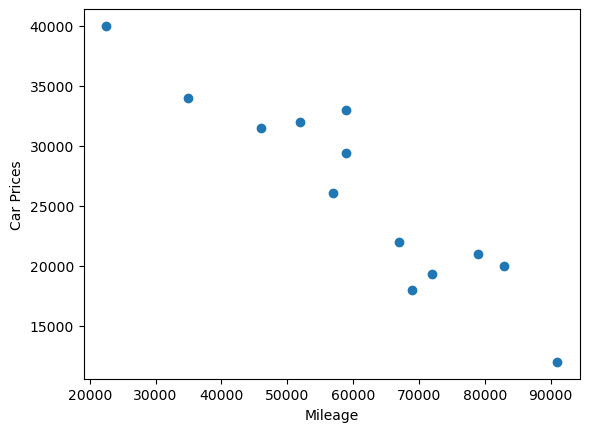

In [4]:
plt.xlabel('Mileage')
plt.ylabel('Car Prices')
plt.scatter(df['Mileage'] , df['Sell Price($)'])
plt.show()

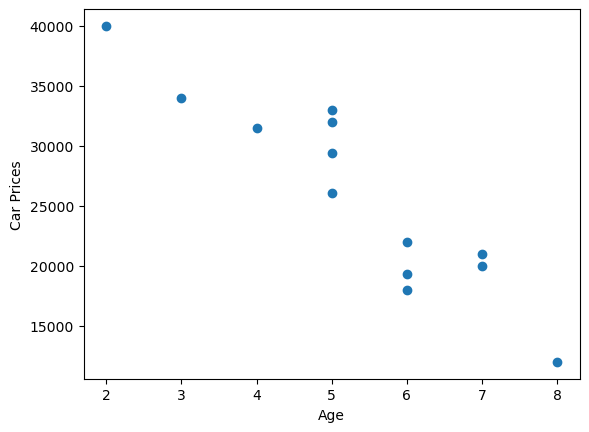

In [5]:
plt.xlabel('Age')
plt.ylabel('Car Prices')
plt.scatter(df['Age(yrs)'] , df['Sell Price($)'])
plt.show()


In [6]:
car_model_grp = df.groupby(['Car Model'])

In [7]:
car_model_grp.mean()['Sell Price($)']

Car Model
Audi A5                  23175.0
BMW X5                   29920.0
Mercedez Benz C class    24000.0
Name: Sell Price($), dtype: float64

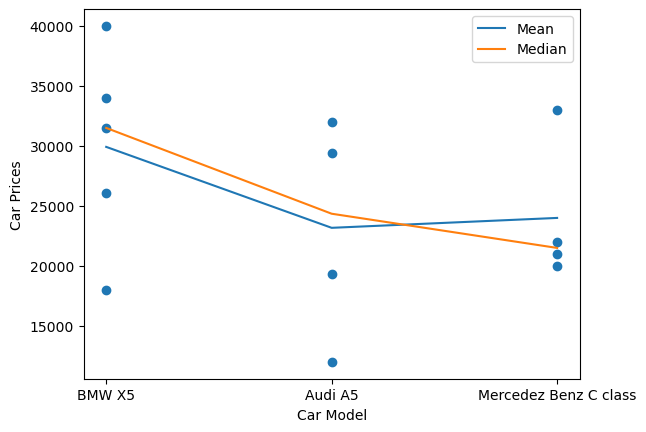

In [8]:
plt.xlabel('Car Model')
plt.ylabel('Car Prices')
plt.scatter(df['Car Model'] , df['Sell Price($)'])

plt.plot(df['Car Model'] ,car_model_grp.mean()['Sell Price($)'][df['Car Model']] , label = "Mean")
plt.plot(df['Car Model'] ,car_model_grp.median()['Sell Price($)'][df['Car Model']] , label = "Median")
plt.legend()

plt.show()


In [9]:
lb = LabelEncoder()


In [10]:
car_model_dummies = lb.fit_transform(df['Car Model'])


In [11]:
car_model_dummies = car_model_dummies.reshape(-1,1)

In [12]:
ohe = OneHotEncoder()


In [13]:
car_model_dummies = pd.DataFrame(ohe.fit_transform(car_model_dummies).toarray()[:,:-1] , dtype = int , columns=['audi' , 'bmw'])

In [14]:
car_model_dummies.head()

,audi,bmw
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [15]:
X = df.drop(columns=['Car Model' , 'Sell Price($)'])
y = df['Sell Price($)']

In [16]:
X.head()

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4


In [17]:
y.head()

0    18000
1    34000
2    26100
3    40000
4    31500
Name: Sell Price($), dtype: int64

In [18]:
X = pd.concat([car_model_dummies,X] , axis = "columns")

In [19]:
X

,audi,bmw,Mileage,Age(yrs)
0,0,1,69000,6
1,0,1,35000,3
2,0,1,57000,5
3,0,1,22500,2
4,0,1,46000,4
5,1,0,59000,5
6,1,0,52000,5
7,1,0,72000,6
8,1,0,91000,8
9,0,0,67000,6


In [20]:
reg = LinearRegression()

In [21]:
reg.fit(X.values , y.values)

LinearRegression()

In [22]:
x_pred = [
    [0,0,45000,4],
    [0,1,86000,7],
]

In [23]:
reg.predict(x_pred)

array([36991.31721061, 11080.74313219])

In [24]:
# Accuracy of the Model

reg.score(X.values,y.values)

0.9417050937281083

In [25]:
MODEL_SAVE_PATH = r"car_prices_lr_model"
joblib.dump(reg ,MODEL_SAVE_PATH )


['car_prices_lr_model']

In [26]:
del reg


In [27]:
reg = joblib.load( MODEL_SAVE_PATH)

In [28]:
reg.predict(x_pred)


array([36991.31721061, 11080.74313219])